In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, norm
import os.path

import IPython

test_idx=6558
sel_points = [1173,4644,1891,4936,1735,3562]
# 'damping' means no damping or weight decay (oops), same as LBFGS
# 'special' means regular CNN-type settings with damping/wd
mode = 'special'

sns.set(color_codes=True)
sns.set_style('white')

def ceil_divide(numer,denom):
    return (numer-1)//denom+1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
seed = 0
f = np.load('../../output/{}_seed{}_warm_pred_infl_logreg_remove_{}.npz'.format(mode,seed,sel_points))
predicted_loss_diffs = f['pred_infl']
warm_loss_diffs = f['warm_infl']

f = np.load('../../output/{}_seed{}_losses_logreg.npz'.format(mode,seed))
losses = f['losses']
losses_fine = f['losses_fine']

losses_removed = []
losses_removed_fine = []
diffs = []
diffs_fine = []
warm_losses = []
for point in sel_points:
    f = np.load('../../output/{}_seed{}_remove{}_only_losses_logreg.npz'.format(mode,seed,point))
    losses_removed.append(f['losses_removed'])
    losses_removed_fine.append(f['losses_removed_fine'])
    diffs.append(np.subtract(losses_removed[-1],losses))
    diffs_fine.append(np.subtract(losses_removed_fine[-1],losses_fine))
    f = np.load('../../output/{}_mnist_small_all_cnn_c_hidden0_seed{}_iter-300000_remove{}_retrain_losses.npz'.format(mode,seed,point))
    warm_losses.append(f['retrain_losses'])
    #f = np.load('../../output/hidden0_seed{}_{}_losses_and_diff.npz'.format(seed,point))
    #warm_losses.append(f['losses_removed'])
diffs = np.array(diffs)
diffs_fine = np.array(diffs_fine)

[-3.45755219e-02  1.33258104e-03  6.81561232e-03  2.03847885e-05
  2.02314258e-02 -3.45706940e-05]
[-7.83528501e-04  4.00126284e-04  1.34993293e-03 -7.59593126e-06
  3.42722199e-04  3.13426278e-04]


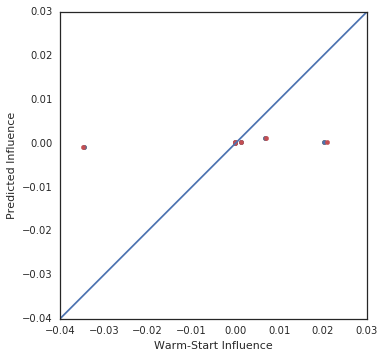

In [12]:
print(warm_loss_diffs)
plt.scatter(warm_loss_diffs, predicted_loss_diffs[sel_points])
plt.scatter(diffs[:,-1], predicted_loss_diffs[sel_points],color='r')
plt.axes().set_aspect('equal')
plt.xlim(-0.04,0.03)
plt.ylim(-0.04,0.03)
plt.xlabel('Warm-Start Influence')
plt.ylabel('Predicted Influence')
plt.plot([-0.1,0.1],[-0.1,0.1])
print(predicted_loss_diffs[sel_points])

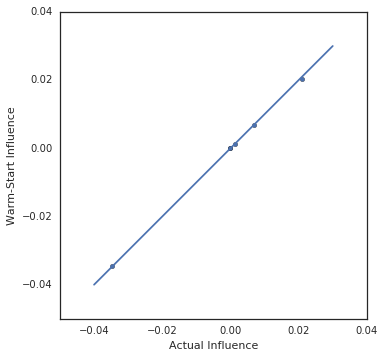

In [15]:
plt.scatter(diffs[:,-1],warm_loss_diffs)
plt.plot([-0.04,0.03],[-0.04,0.03])
plt.axes().set_aspect('equal')
plt.xlabel('Actual Influence')
plt.ylabel('Warm-Start Influence')

In [14]:
def plot_tracked_losses(seed,point,first):
    assert point in sel_points
    idx = sel_points.index(point)

    sns.set_style('white')
    fontsize=16
    fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(8, 8))
    plt.subplots_adjust(wspace=0.4)
    plt.suptitle('Seed {} Remove {}: {}'.format(seed, point, predicted_loss_diffs[point]))
    
    axs[0][0].plot(range(first,300),losses[first:],color='b')
    axs[0][0].plot(range(first,300),losses_removed[idx][first:],color='r')
    axs[0][0].plot(range(300,900),warm_losses[idx],color='g')
    axs[0][0].set_xlabel('Thousands of steps')
    axs[0][0].set_ylabel('Loss on test pt')

    axs[0][1].scatter(range(first,300),diffs[idx][first:],alpha=0.5,color='r')
    axs[0][1].scatter(range(300,900),np.subtract(warm_losses[idx],losses[-1]),alpha=0.2,color='g')
    axs[0][1].set_xlabel('Thousands of steps')
    axs[0][1].set_ylabel('Diff in loss')
    axs[0][1].hlines(0,-1,901,color='k',alpha=0.5,zorder=1)
    #axs[0][1].plot(range(300), np.poly1d(np.polyfit(range(300), diffs, 1))(range(300)),color='r')

    axs[1][0].plot(range(first,100),losses_fine[first:])
    axs[1][0].plot(range(first,100),losses_removed_fine[idx][first:],color='r')
    axs[1][0].set_xlabel('Steps')
    axs[1][0].set_ylabel('Loss on test pt')

    axs[1][1].scatter(range(first,100),diffs_fine[idx][first:],alpha=0.5,color='r')
    axs[1][1].set_xlabel('Steps')
    axs[1][1].set_ylabel('Diff in loss')
    axs[1][1].hlines(0,first-1,101,color='k',alpha=0.5,zorder=1)
    #axs[1][1].plot(range(100), np.poly1d(np.polyfit(range(100), diffs_fine, 1))(range(100)),color='r')
    
    print("Orig {}, removed {}".format(losses[299],losses_removed[idx][299]))
    print("Actual: {}".format(losses_removed[idx][299]-losses[299]))
    print("Pred: {}".format(predicted_loss_diffs[point]))

Orig 0.790534317493, removed 0.785034477711
Actual: -0.00549983978271
Pred: -0.00518331388994
Orig 0.790534317493, removed 0.790390253067
Actual: -0.000144064426422
Pred: -0.000141153877432
Orig 0.790534317493, removed 0.792104244232
Actual: 0.00156992673874
Pred: 0.00141889398748
Orig 0.790534317493, removed 0.790502786636
Actual: -3.15308570862e-05
Pred: -2.89768630808e-05
Orig 0.790534317493, removed 0.792978286743
Actual: 0.00244396924973
Pred: 0.00225338450345
Orig 0.790534317493, removed 0.791222453117
Actual: 0.000688135623932
Pred: 0.000651898470792


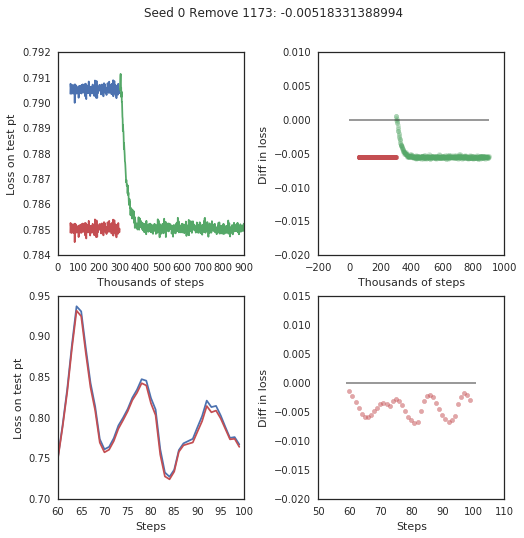

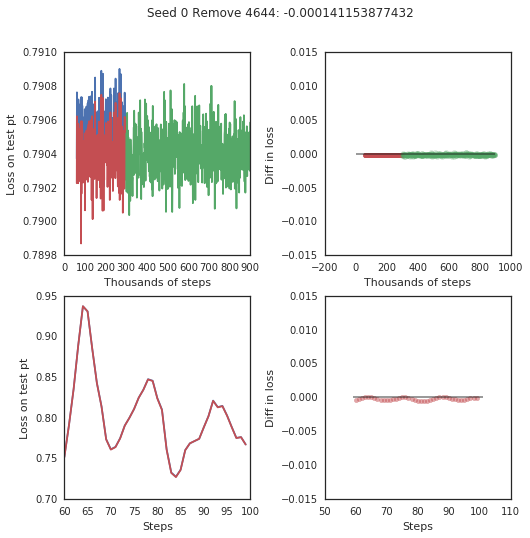

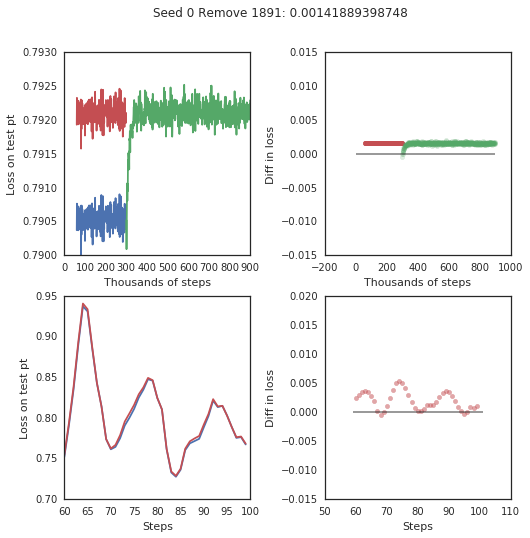

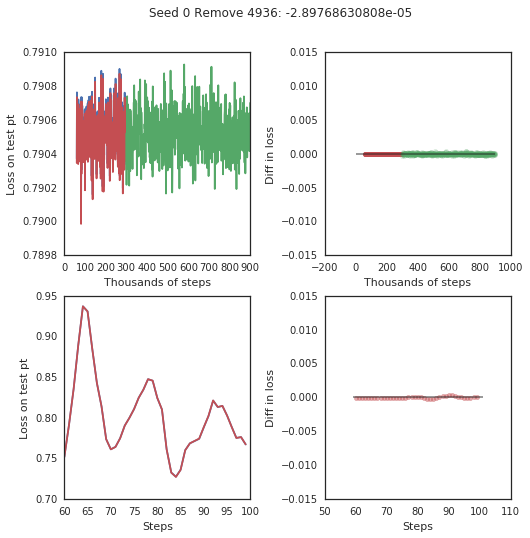

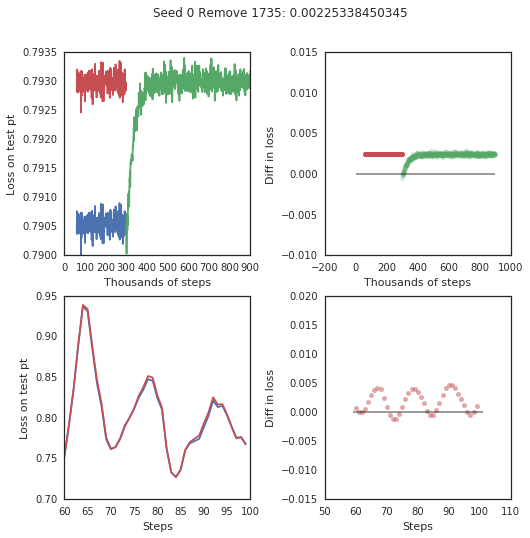

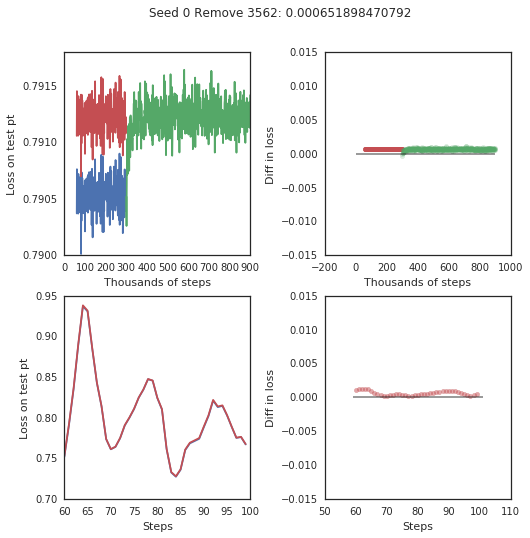

In [6]:
for point in sel_points:
    plot_tracked_losses(0,point,60)

Orig 0.790534317493, removed 0.785034477711
Actual: -0.00549983978271
Pred: -0.00518331388994
Orig 0.790534317493, removed 0.790390253067
Actual: -0.000144064426422
Pred: -0.000141153877432
Orig 0.790534317493, removed 0.792104244232
Actual: 0.00156992673874
Pred: 0.00141889398748
Orig 0.790534317493, removed 0.790502786636
Actual: -3.15308570862e-05
Pred: -2.89768630808e-05
Orig 0.790534317493, removed 0.792978286743
Actual: 0.00244396924973
Pred: 0.00225338450345
Orig 0.790534317493, removed 0.791222453117
Actual: 0.000688135623932
Pred: 0.000651898470792


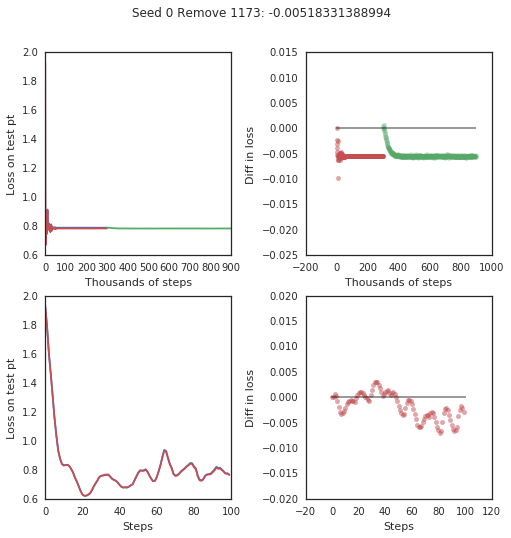

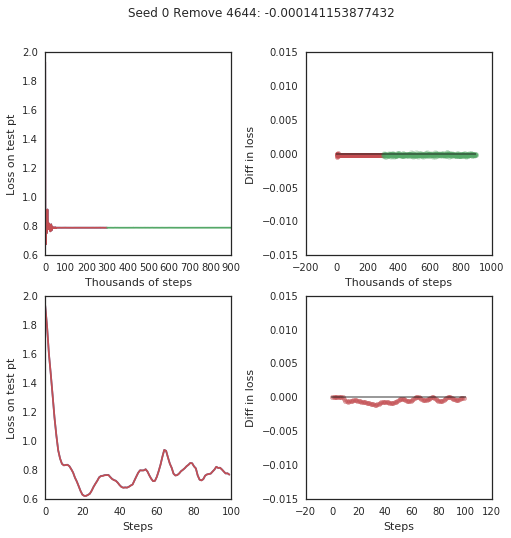

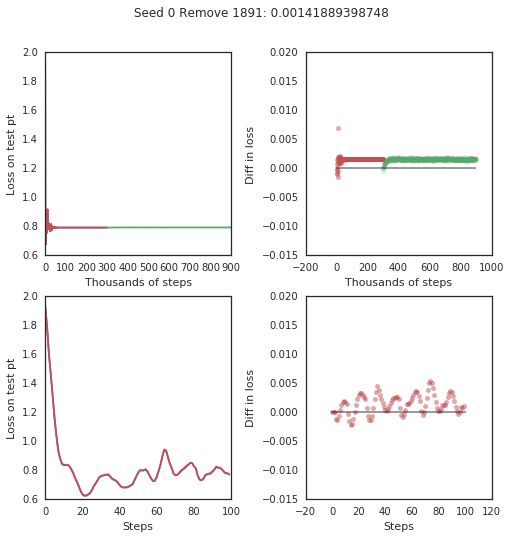

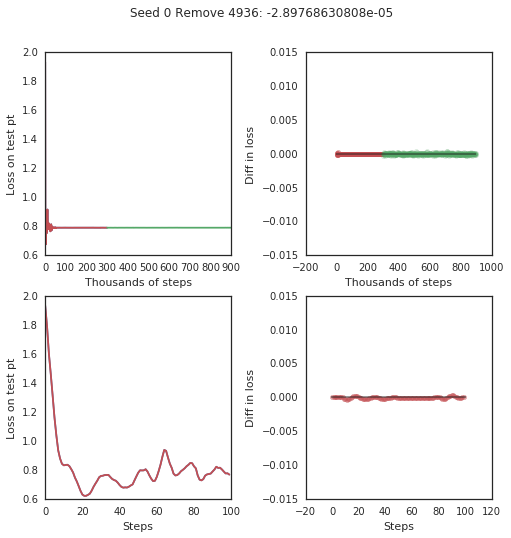

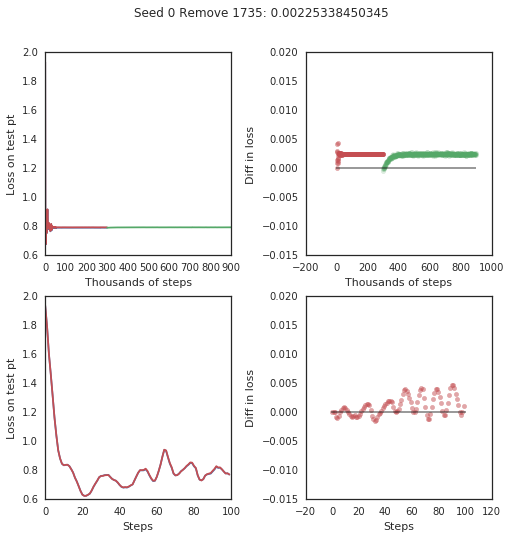

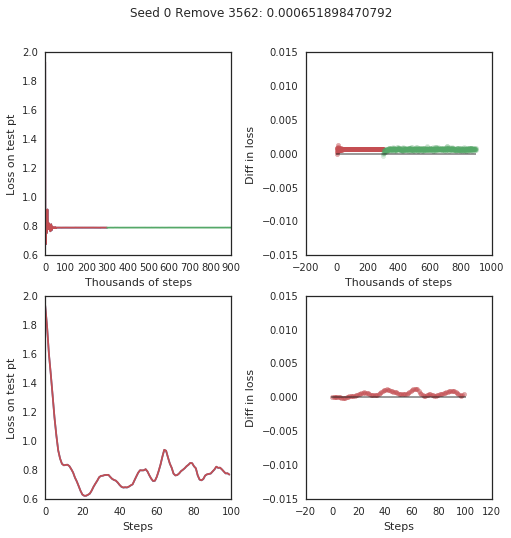

In [7]:
for point in sel_points:
    plot_tracked_losses(0,point,0)

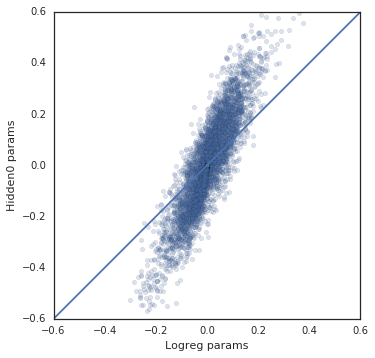

In [8]:
#f = np.load('../../output/logreg_hidden0_params.npz') #special
f = np.load('../../output/logreg_hidden0_params_with_damping.npz')
logreg_params = f['logreg_params']
hidden0_params = f['hidden0_params']
plt.scatter(logreg_params, hidden0_params,alpha=0.2)
plt.plot([-0.6,0.6],[-0.6,0.6])
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
plt.xlabel('Logreg params')
plt.ylabel('Hidden0 params')
plt.axes().set_aspect('equal')